In [1]:
import numpy as np
import higashi
import scipy
from tqdm import tqdm
import os
def get_file_name(file_dir):
    L = []
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            L.append(file)
    return L
def randomfile(file_dir, r):
    scSCRIPE_dir = file_dir + '\\filtered_1000_cells_single_cell_files'
    files = get_file_name(scSCRIPE_dir)
    #np.random.shuffle(files)
    if r >= len(files): r = len(files)
    return files[:r]


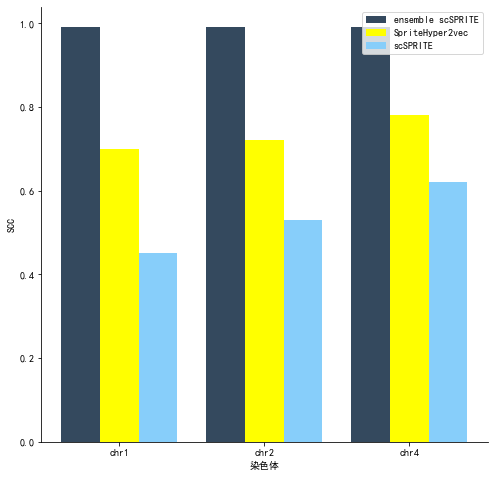

In [19]:
import numpy as np
import pandas as pd
import higashi
from tqdm import tqdm
import matplotlib.gridspec as gridspec
from scipy.sparse import csr_matrix
import scipy
import warnings
from scipy.stats import pearsonr, PearsonRConstantInputWarning
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
def get_mat(chr, num, re, type):
    file_dir = 'D:\\dataset'
    files = randomfile(file_dir, num)
    HiC_dir = file_dir + '\\HiC_node2vec'
    chr_key = chr
    raw, node = get_rawandout(files[0], HiC_dir, chr_key, re, type)
    for file in tqdm(files[1:]):
        r, n = get_rawandout(file, HiC_dir, chr_key, re, type)
        if node.shape == n.shape:
            raw = raw + r
            node = node + n
    if type == '.npz':
        raw = raw.todense()
        node = node.todense()
    np.savetxt('node_' + chr + '_' + str(re) + '.matrix', node, delimiter = "\t", fmt = "%1f")
    np.savetxt('raw_' + chr + '_' + str(re) + '.matrix', raw, delimiter = "\t", fmt = "%1f")
    return
def get_rawandout(file, file_dir, chr_key, re, type):
    #100kb特殊
    o_dir = file_dir + '\\' + file + '\\' + chr_key + '\\' + file + '_' + chr_key + '_' + str(re) + type
    r_dir = file_dir + '\\' + file + '\\' + chr_key + '\\' + 'raw_' + chr_key + '_' + str(re) + type
    #print(o_dir)
    if type == '.matrix.gz':
        raw = np.loadtxt(r_dir)
        node = np.loadtxt(o_dir)
        return raw, node
    elif type == '.npz':
        raw = scipy.sparse.load_npz(r_dir)
        node = scipy.sparse.load_npz(o_dir)
        return raw, node
    return [1], [1]
def Result_record(file_dir, chr_key, file, re=100000):
    chr_dir = file_dir + '\\' + file + '\\' + chr_key + '\\' + file + '_' + chr_key + '.txt'
    if os.path.isfile(chr_dir):
        return True
    return False

import pandas
chr = 'chr1'
index = ['chr1', 'chr2', 'chr4']
columns = ['all', 'node', 'raw']
data1 = pandas.DataFrame(columns=columns, index=index)
data1.loc['chr1'] = [0.99,0.86,0.88]
data1.loc['chr2'] = [0.94,0.85,0.87]
data1.loc['chr4'] = [0.99,0.80,0.83]
data2 = pandas.DataFrame(columns=columns, index=index)
data2.loc['chr1'] = [0.99,0.70,0.45]
data2.loc['chr2'] = [0.99,0.72,0.53]
data2.loc['chr4'] = [0.99,0.78,0.62]
size = 3
# 返回size个0-1的随机数
a = [0.99,0.94,0.99]
b = [0.86,0.85,0.80]
c = [0.88,0.87,0.83]
d = [0.99, 0.99, 0.99]
e = [0.70, 0.72, 0.78]
f = [0.45, 0.53, 0.62]
# x轴坐标, size=5, 返回[0, 1, 2, 3, 4]
x = np.arange(size)
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False
# 有a/b/c三种类型的数据，n设置为3
total_width, n = 0.8, 3
# 每种类型的柱状图宽度
width = total_width / n

# 重新设置x轴的坐标
x = x - (total_width - width) / 2
plt.figure(figsize=(8, 8))
widths = [8]
heights = [10]
gs = gridspec.GridSpec(nrows=1, ncols=1, width_ratios=widths,height_ratios=heights)
# 画柱状图
'''ax = plt.subplot(gs[0, 0])
ax.bar(x, a, width=width, label="all")
ax.bar(x + width, b, width=width, label="node")
ax.bar(x + 2*width, c, width=width, label="raw")
# 显示图例
plt.xticks(x + width,['chr1','chr2','chr4'])
plt.legend()'''
plt.ylabel("pearson", fontsize=15)

ax = plt.subplot(gs[0, 0])
ax.bar(x, d, width=width, label="ensemble scSPRITE", color='#34495e')
ax.bar(x + width, e, width=width, label="SpriteHyper2vec", color='yellow')
ax.bar(x + 2*width, f, width=width, label="scSPRITE", color="lightskyblue")
# 显示图例
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(x + width,['chr1','chr2','chr4'])
plt.legend()
plt.ylabel("SCC", fontsize=10)
plt.xlabel("染色体", fontsize=10)
# 显示柱状图
plt.show()


In [146]:

get_mat('chr4', 50, 100000, '.matrix.gz')

100%|██████████| 49/49 [01:25<00:00,  1.75s/it]


In [ ]:
0.99 0.86 0.88
0.99 0.70 0.45
0.94 0.85 0.87
0.99 0.72 0.53
0.99 0.80 0.83
0.99 0.78 0.62

0.846398904730961 0.9179962058893931


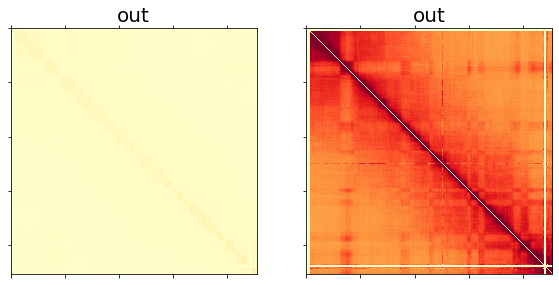

In [88]:
#mat1 = np.loadtxt('D:\\dataset\\HiC_data\\GSE114242_mouse_intra_200kb\\mouse_' + 'chr2' + '_200kb_all_nover2.txt')
file_dir = 'D:\\dataset'
all = np.loadtxt('abcdddd.matrix')
n_a = np.loadtxt('norm_raw_all_chr2_200000.matrix')
p2 = higashi.pearson_score(n_a, all)
print(p2)
def fig_chr_heatmap(out_matrix, raw_out_matrix):
    plt.figure(figsize=(15, 6))
    widths = [5, 5, 5]
    heights = [5, 1]
    gs = gridspec.GridSpec(nrows=2, ncols=3, width_ratios=widths,height_ratios=heights)
    #data = np.tril(out_matrix, k=0) + np.triu(raw_out_matrix, k=0)
    ax = plt.subplot(gs[0, 0])
    ax.matshow(raw_out_matrix, cmap='YlOrRd', vmin=0, vmax=16)
    ax.set_title('out', fontdict={'fontsize': 20, 'fontweight': 'medium'})
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax = plt.subplot(gs[0, 1])
    ax.matshow(out_matrix, cmap='YlOrRd', vmin=0, vmax=0.5)
    ax.set_title('out', fontdict={'fontsize': 20, 'fontweight': 'medium'})
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.show()
fig_chr_heatmap(n_a, all)



In [14]:
import pandas
data = np.loadtxt('D:\\project\\n1.1\\HiC_node2vec\\scc_defernum.txt')
data1 = pandas.DataFrame(data, columns=['node', 'raw', 'num'])
data1

node       raw    num
0   0.231771  0.223868   10.0
1   0.306555  0.265291   50.0
2   0.393026  0.339733  100.0
3   0.286134  0.271598   50.0
4   0.469045  0.418489  100.0
5   0.306739  0.289490   50.0
6   0.399775  0.350473  100.0
7   0.576008  0.504860  200.0
8   0.780491  0.636987  500.0
9   0.233293  0.244522   50.0
10  0.381953  0.353879  100.0
11  0.546430  0.475576  200.0
12  0.309798  0.293414   50.0
13  0.452075  0.408736  100.0
14  0.299547  0.272993   50.0
15  0.427697  0.393640  100.0
16  0.602410  0.534465  200.0
17  0.331029  0.304305   50.0
18  0.228418  0.198541   50.0
19  0.428814  0.385972  100.0
20  0.590025  0.510506  200.0
21  0.798659  0.648123  500.0
22  0.332688  0.317601   50.0
23  0.459979  0.411026  100.0
24  0.562546  0.497268  200.0
25  0.841324  0.674755  500.0
26  0.297645  0.281971   50.0
27  0.404959  0.371624  100.0
28  0.337688  0.304686   50.0
29  0.450173  0.405345  100.0
30  0.534440  0.467043  200.0
31  0.855530  0.691170  500.0
32  0.329880  0.317477   50.0
33  0.425245  0.398893  100.0
34  0.556427  0.483972  200.0
35  0.282052  0.282083   50.0
36  0.374015  0.344591  100.0
37  0.574111  0.491948  200.0
38  0.805032  0.655441  500.0
39  0.277666  0.252957   50.0
40  0.421480  0.367561  100.0
41  0.597828  0.520559  200.0
42  0.810468  0.663001  500.0
43  0.331512  0.309248   50.0
44  0.401820  0.375697  100.0
45  0.590298  0.511578  200.0
46  0.797154  0.662768  500.0

In [25]:
data1[data1['num']==500][['node', 'raw']]

node       raw
8   0.780491  0.636987
21  0.798659  0.648123
25  0.841324  0.674755
31  0.855530  0.691170
38  0.805032  0.655441
42  0.810468  0.663001
46  0.797154  0.662768

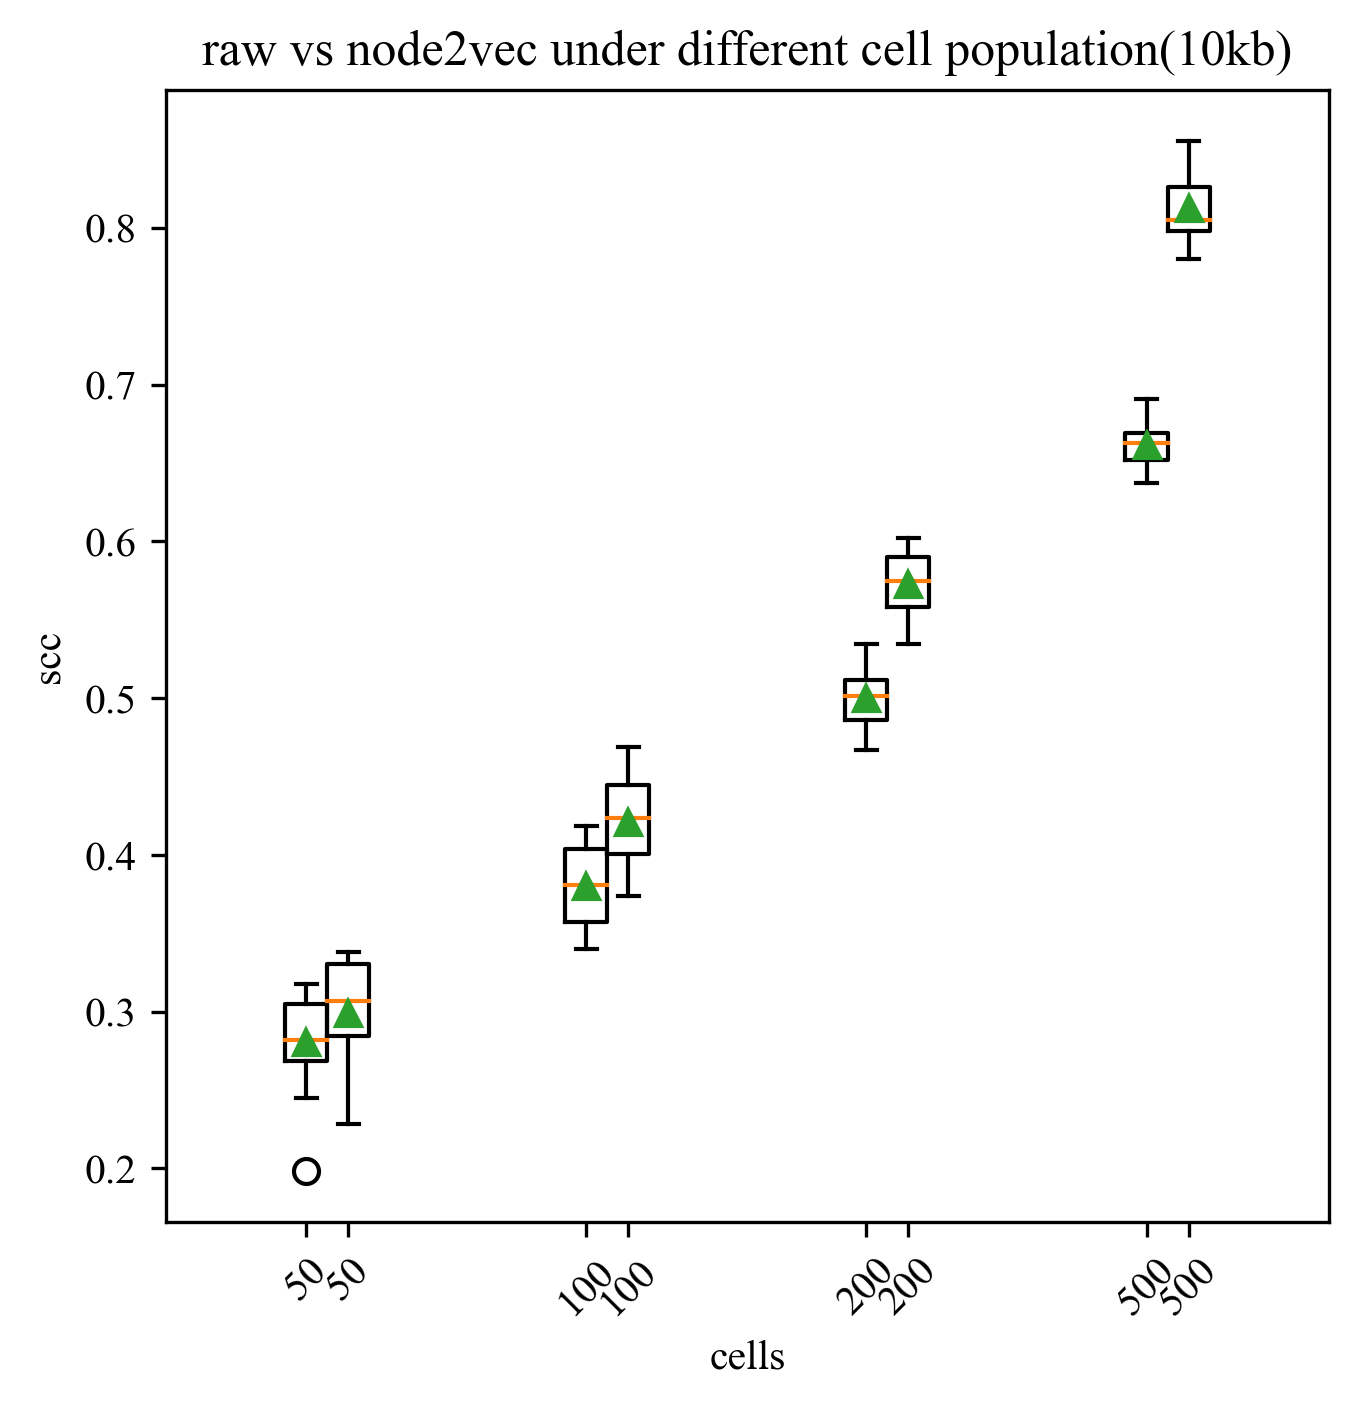

In [33]:
import warnings
import matplotlib.pyplot as plt
from pylab import *
rcParams['axes.unicode_minus'] = False
rcParams['font.sans-serif'] = ['Simhei']
plt.figure(figsize=(5, 5), dpi=300)
plt.rc('font', family='Times New Roman', size=15)
plt.boxplot(data1[data1['num']==50][['raw']], labels=['50'], showmeans=True, positions=[0.1])
plt.boxplot(data1[data1['num']==50][['node']], labels=['50'], showmeans=True, positions=[0.25])
plt.boxplot(data1[data1['num']==100][['raw']], labels=['100'], showmeans=True, positions=[1.1])
plt.boxplot(data1[data1['num']==100][['node']], labels=['100'], showmeans=True, positions=[1.25])
plt.boxplot(data1[data1['num']==200][['raw']], labels=['200'], showmeans=True, positions=[2.1])
plt.boxplot(data1[data1['num']==200][['node']], labels=['200'], showmeans=True, positions=[2.25])
plt.boxplot(data1[data1['num']==500][['raw']], labels=['500'], showmeans=True, positions=[3.1])
plt.boxplot(data1[data1['num']==500][['node']], labels=['500'], showmeans=True, positions=[3.25])
plt.tick_params(labelsize=10)
plt.xticks(rotation=45)
plt.xlabel("cells", fontdict={'size': 10})
plt.ylabel("scc", fontdict={'size': 10})
plt.title("raw vs node2vec under different cell population(10kb)", fontdict={'size': 12})
plt.show()

In [91]:
from itertools import combinations


def get_Multiple_interactions(chr_key, scSCRIPE_dir, file, re, chr):
    f = open(scSCRIPE_dir + '\\' + file, 'r', encoding='utf-8')
    Multiple_interactions = {}
    idx = 0
    while True:
        line = f.readline()
        if not line:
            break;
        a = line.strip().split()
        if len(a) < 3:
            continue
        del a[0]
        i = 0
        b = []
        for obj in a:
            if len(chr_key) <= 4:
                if obj[:5] == chr_key + ':' and int(obj[5:]) <= chr:
                    b.append(str(int(obj[5:]) // re))  # 取100k为分辨率
                    i += 1
            else:
                if obj[:6] == chr_key + ':' and int(obj[6:]) <= chr:
                    b.append(str(int(obj[6:]) // re))  # 取100k为分辨率
                    i += 1
        b = list(set(b))
        if not b or len(b) < 2:
            continue
        if len(b) >= 1000: continue
        Multiple_interactions[idx] = b
        idx += 1
    f.close()
    return Multiple_interactions
def get_raw(chr, re, Multiple_interactions):
    raw_output = np.zeros((chr // re + 1, chr // re + 1))
    for edge in Multiple_interactions.keys():
        if len(Multiple_interactions[edge]) >= 1000: continue
        for bin1, bin2 in combinations(Multiple_interactions[edge], 2):
            raw_output[int(bin1)][int(bin2)] += 1
            raw_output[int(bin2)][int(bin1)] += 1
    return raw_output



file_dir = 'D:\\dataset\\GSE114242_mouse_combined_clusters'
Multiple_interactions = get_Multiple_interactions('chr4', file_dir, 'combined.mapq-ge10.clusters', 100000, 155630120)
raw_output = get_raw(155630120, 100000, Multiple_interactions)
np.savetxt('a_chr4_100000.matrix', raw_output)

In [7]:
with open('headerychr4.txt', 'w') as f:
    re = 40000
    for i in range(1, 155630120//re + 2):
        f.writelines(str(i) + '|' + 'chr4:' + str((i-1)*re + 1) + '_' + str(i * re) + '\n')


In [8]:
import numpy as np
re = 40000
a = np.loadtxt('norm_raw_all_chr4_40000.matrix')
np.savetxt('ab22.matrix', a[500:1000, 500:1000], fmt='%.1f',delimiter='\t')
'''with open('header3.header', 'w') as f:
    for i in range(1, 501):
        f.writelines(str(i) + '|' + 'chr4:' + str((i-1)*re + 1) + '_' + str(i * re) + '  ')'''
header = []
for i in range(1, 501):
    header.append(str(i))
np.savetxt('header2.header', header,  fmt='%s', delimiter='\t')
#data = pd.DataFrame(a[0:500, 0:500], columns=header)
#data
#np.savetxt('data.matrix', data, fmt='%1f', delimiter='\t')

In [37]:
import pandas as pd
import numpy as np
mat = np.loadtxt('norm_raw_all_chr4_40000.matrix', delimiter='\t')
mat
colnames = ['|'.join(['bin'+str(m),'mm9' ,'chr'+':'+str(int(m*re))+'-'+str(int(m*re+re))]) for m in range(len(mat))]
cell_pd = pd.DataFrame(mat)
cell_pd.columns = colnames
cell_pd.index = colnames
a = pd.DataFrame(mat)
cell_pd

bin0|mm9|chr:0-40000  \
bin0|mm9|chr:0-40000                                  0.0   
bin1|mm9|chr:40000-80000                              0.0   
bin2|mm9|chr:80000-120000                             0.0   
bin3|mm9|chr:120000-160000                            0.0   
bin4|mm9|chr:160000-200000                            0.0   
...                                                   ...   
bin3886|mm9|chr:155440000-155480000                   0.0   
bin3887|mm9|chr:155480000-155520000                   0.0   
bin3888|mm9|chr:155520000-155560000                   0.0   
bin3889|mm9|chr:155560000-155600000                   0.0   
bin3890|mm9|chr:155600000-155640000                   0.0   

                                     bin1|mm9|chr:40000-80000  \
bin0|mm9|chr:0-40000                                      0.0   
bin1|mm9|chr:40000-80000                                  0.0   
bin2|mm9|chr:80000-120000                                 0.0   
bin3|mm9|chr:120000-160000                                0.0   
bin4|mm9|chr:160000-200000                                0.0   
...                                                       ...   
bin3886|mm9|chr:155440000-155480000                       0.0   
bin3887|mm9|chr:155480000-155520000                       0.0   
bin3888|mm9|chr:155520000-155560000                       0.0   
bin3889|mm9|chr:155560000-155600000                       0.0   
bin3890|mm9|chr:155600000-155640000                       0.0   

                                     bin2|mm9|chr:80000-120000  \
bin0|mm9|chr:0-40000                                       0.0   
bin1|mm9|chr:40000-80000                                   0.0   
bin2|mm9|chr:80000-120000                                  0.0   
bin3|mm9|chr:120000-160000                                 0.0   
bin4|mm9|chr:160000-200000                                 0.0   
...                                                        ...   
bin3886|mm9|chr:155440000-155480000                        0.0   
bin3887|mm9|chr:155480000-155520000                        0.0   
bin3888|mm9|chr:155520000-155560000                        0.0   
bin3889|mm9|chr:155560000-155600000                        0.0   
bin3890|mm9|chr:155600000-155640000                        0.0   

                                     bin3|mm9|chr:120000-160000  \
bin0|mm9|chr:0-40000                                        0.0   
bin1|mm9|chr:40000-80000                                    0.0   
bin2|mm9|chr:80000-120000                                   0.0   
bin3|mm9|chr:120000-160000                                  0.0   
bin4|mm9|chr:160000-200000                                  0.0   
...                                                         ...   
bin3886|mm9|chr:155440000-155480000                         0.0   
bin3887|mm9|chr:155480000-155520000                         0.0   
bin3888|mm9|chr:155520000-155560000                         0.0   
bin3889|mm9|chr:155560000-155600000                         0.0   
bin3890|mm9|chr:155600000-155640000                         0.0   

                                     bin4|mm9|chr:160000-200000  \
bin0|mm9|chr:0-40000                                        0.0   
bin1|mm9|chr:40000-80000                                    0.0   
bin2|mm9|chr:80000-120000                                   0.0   
bin3|mm9|chr:120000-160000                                  0.0   
bin4|mm9|chr:160000-200000                                  0.0   
...                                                         ...   
bin3886|mm9|chr:155440000-155480000                         0.0   
bin3887|mm9|chr:155480000-155520000                         0.0   
bin3888|mm9|chr:155520000-155560000                         0.0   
bin3889|mm9|chr:155560000-155600000                         0.0   
bin3890|mm9|chr:155600000-155640000                         0.0   

                                     bin5|mm9|chr:200000-240000  \
bin0|mm9|chr:0-40000                                 

In [38]:
cell_pd.to_csv('2.csv')


In [29]:
temp = np.array(mat)
temp
cell_pd = pd.DataFrame(temp, columns=colnames, index=colnames)
cell_pd.to_csv('1.csv')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])